Mean Absolute Error (MAE): 25.372012534300957
Mean Squared Error (MSE): 886.1111822339853
Root Mean Squared Error (RMSE): 29.767619693787836
R² Score: 0.7788494760880946


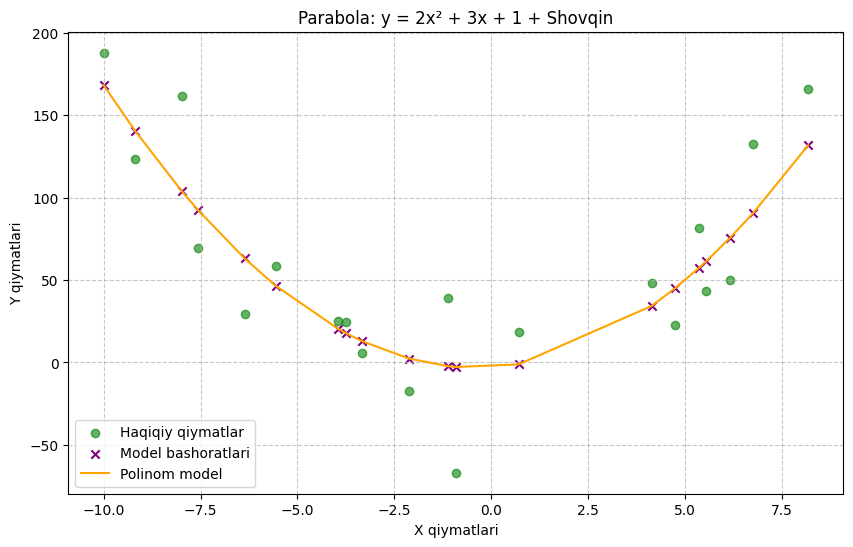

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ma'lumotlarni yaratish (parabola + shovqin)
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 2 * x**2 + 3 * x + 1 + np.random.normal(0, 40, x.shape)  # Boshqa shakldagi parabola

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Polinominal xususiyatlarni yaratish
poly = PolynomialFeatures(degree=2)  # 2-darajali polinom
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Modelni yaratish va o'qitish
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Bashoratlar
y_pred = model.predict(x_test_poly)

# Metrikalarni hisoblash
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Grafikni chizish (Boshqa uslubda)
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='green', label='Haqiqiy qiymatlar', alpha=0.6)
plt.scatter(x_test, y_pred, color='purple', label='Model bashoratlari', marker='x')
plt.plot(np.sort(x_test, axis=0), model.predict(poly.transform(np.sort(x_test, axis=0))),
         color='orange', label='Polinom model')
plt.title("Parabola: y = 2x² + 3x + 1 + Shovqin")
plt.xlabel("X qiymatlari")
plt.ylabel("Y qiymatlari")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()